In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/required-documents/sample_submission.csv
/kaggle/input/required-documents/train.csv
/kaggle/input/required-documents/test.csv


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
import xgboost as xgb
import catboost as ctb

In [6]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [7]:
train_copy = train.copy()
train_copy.drop(['Cabin'],axis = 1,inplace = True)

In [8]:
train.drop(['PassengerId','Name'],axis = 1, inplace = True)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [10]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
home_planet = train.iloc[:,0].values
print(home_planet)
print(home_planet.shape)

['Europa' 'Earth' 'Europa' ... 'Earth' 'Europa' 'Europa']
(8693,)


In [92]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [17]:
train = pd.get_dummies(train,columns = ['HomePlanet','CryoSleep','Destination','VIP'])
train.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1,1,0


Scaling needs to be done.

<p>Age , room service ,food court, shopping mall, spa,vr deck e scaling yapılacak.</p>

In [12]:
scaler = MinMaxScaler()

In [13]:
train.drop(['Cabin'],axis=1,inplace = True)


In [14]:
label_encoder = LabelEncoder()
train['Transported'] = label_encoder.fit_transform(train['Transported'])

In [19]:
scaled = scaler.fit_transform(train)

In [18]:
train.dtypes


Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
CryoSleep_False                uint8
CryoSleep_True                 uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
VIP_False                      uint8
VIP_True                       uint8
dtype: object

In [20]:
scaled

array([[4.93670886e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.03797468e-01, 7.60801284e-03, 3.01881729e-04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.34177215e-01, 3.00132617e-03, 1.19947674e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.29113924e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.05063291e-01, 0.00000000e+00, 3.51859927e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.56962025e-01, 8.79458365e-03, 1.57246839e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
# Benim amacım scale işlemi yaparak ML modelinin daha düzgün bir hale gelmesini sağlamak bulduğum bu değerleri datasetimin içerisine atarken problem yaşıyorum.

In [ ]:
train_copy

In [ ]:
train_copy.head()

In [ ]:
# EDA AÇISINDAN PLOTTING işlemleri olabilir onları yapabilirim veya ml algoritmalarını deneyerek devam edebilirim.

In [33]:
# ml algolarına bi giriş yap train test split ayır
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0


In [21]:
min_max_scaler = MinMaxScaler(feature_range = (0,1)) 
train.iloc[:,:6] = min_max_scaler.fit_transform(train.iloc[:,0:6].values)

In [22]:
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,1,1,0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,1,1,0,0,1,0,0,0,1,1,0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0,0,1,0,1,0,0,0,1,0,1
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0,0,1,0,1,0,0,0,1,1,0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,1,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066,0,0,1,0,1,0,1,0,0,0,1
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,1,0,1,0
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000,1,1,0,0,1,0,0,0,1,1,0
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049,0,0,1,0,1,0,1,0,0,1,0


In [34]:
train_copy_to_be_trained = train.drop(['Transported'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(train_copy_to_be_trained,train['Transported'],test_size = 0.2, shuffle= True)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

6096
1524
6096
1524


<h2> Lets try out some ML algori

In [ ]:
""" 
feature extraction kaldı
plotly ile bir şeyleri bastırman lazım
ml algoritmaları ile de doğruluk payını vs denemen gerekiyor.
"""

In [31]:
train.dropna(inplace = True)
train.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
dtype: int64

In [35]:
x_train.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
dtype: int64

svm
random forest
xgboost
gradient boosting algoritmalarını bi dene bakalım.

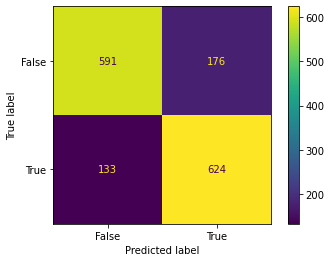

In [77]:

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# get all of the accuracy score and make a bar chart to show them.

In [152]:
def modelImplementation(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_scores = accuracy_score(y_test,y_pred.round())
    f1_scores = f1_score(y_test,y_pred.round())
    conf_matrix = confusion_matrix(y_test,y_pred.round())
    return acc_scores,f1_scores,conf_matrix

In [153]:
cat_boost = ctb.CatBoostClassifier()
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree = 0.3,learning_rate = 0.1, max_depth=5 , alpha=10 , n_estimators = 10)
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
clf = SVC(kernel = "linear")
logisticRegr = LogisticRegression()

In [155]:
list_of_models = []
list_of_models.append(cat_boost)
list_of_models.append(xg_reg)
list_of_models.append(rf)
list_of_models.append(clf)
list_of_models.append(logisticRegr)

accuracy_scores = [modelImplementation(model)[0] for model in list_of_models]
f1_scores = [modelImplementation(model)[1] for model in list_of_models]
conf_matrices = [modelImplementation(model)[2] for model in list_of_models]

Learning rate set to 0.022292
0:	learn: 0.6808310	total: 3.6ms	remaining: 3.6s
1:	learn: 0.6706758	total: 6.68ms	remaining: 3.34s
2:	learn: 0.6596851	total: 9.78ms	remaining: 3.25s
3:	learn: 0.6510287	total: 12.8ms	remaining: 3.18s
4:	learn: 0.6416054	total: 15.6ms	remaining: 3.11s
5:	learn: 0.6340418	total: 18.5ms	remaining: 3.06s
6:	learn: 0.6256032	total: 21.5ms	remaining: 3.04s
7:	learn: 0.6187996	total: 24.4ms	remaining: 3.02s
8:	learn: 0.6106374	total: 27.4ms	remaining: 3.02s
9:	learn: 0.6031369	total: 30.3ms	remaining: 3s
10:	learn: 0.5968244	total: 33.3ms	remaining: 2.99s
11:	learn: 0.5896333	total: 36.3ms	remaining: 2.98s
12:	learn: 0.5850144	total: 39.8ms	remaining: 3.02s
13:	learn: 0.5798031	total: 43.8ms	remaining: 3.08s
14:	learn: 0.5733254	total: 47.5ms	remaining: 3.12s
15:	learn: 0.5674787	total: 51.2ms	remaining: 3.15s
16:	learn: 0.5624870	total: 54.9ms	remaining: 3.18s
17:	learn: 0.5575225	total: 58.8ms	remaining: 3.21s
18:	learn: 0.5532479	total: 62.4ms	remaining: 3.2

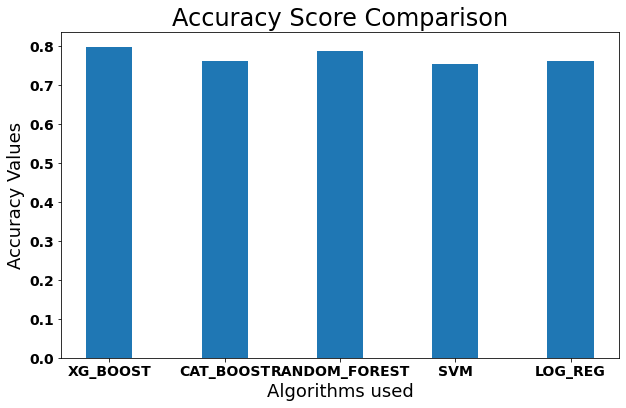

In [157]:

plt.figure(figsize=(10,6))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font',**font)
plt.bar(["XG_BOOST","CAT_BOOST","RANDOM_FOREST","SVM","LOG_REG"],accuracy_scores,width=0.4)
plt.xlabel("Algorithms used")
plt.ylabel("Accuracy Values")
plt.title("Accuracy Score Comparison")
plt.show()

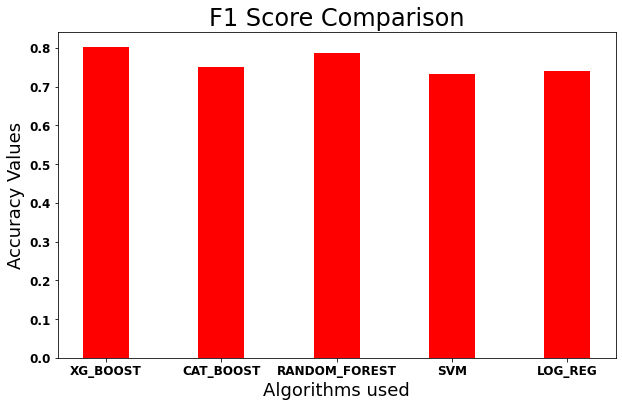

In [159]:
plt.figure(figsize=(10,6))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
algorithm_lists = ["XG_BOOST","CAT_BOOST","RANDOM_FOREST","SVM","LOG_REG"]

plt.rc('font',**font)
plt.bar(algorithm_lists,f1_scores,width=0.4,color='red')
plt.xlabel("Algorithms used")
plt.ylabel("Accuracy Values")
plt.title("F1 Score Comparison")
plt.show()

[]
[[591 176]
 [133 624]]
[[614 153]
 [210 547]]
[[602 165]
 [158 599]]
[[639 128]
 [246 511]]
[[637 130]
 [235 522]]


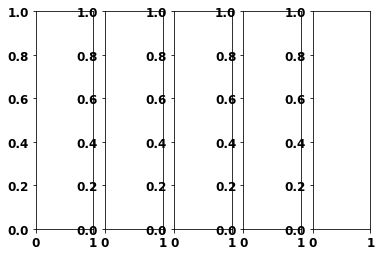

In [162]:
figure,axis = plt.subplots(1,5)
for i in range(len(conf_matrices)):
    axis[0:i] = ConfusionMatrixDisplay(confusion_matrix=conf_matrices[i],display_labels=["False","True"])
    print(axis[0:i])
    print(conf_matrices[i])

In [163]:
# feature extraction k fold gibi işlemler yapmak kaldı, proje içi plotlar yapılıp kodlar düzeltilip, biraz açıklama eklenir,
# hyperparametre tuning yapılırsa bu iş tamam bence